# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**: Beatriz Rogers Tripoli Barbosa

**RA**: 792170 

**Nome**: Laura Naomi Seto

**RA**: 813210


---
## Análise exploratória

Nesta seção, foi realiza uma análise dos atributos no que diz respeito ao significado deles para o problema.

### Análise dos atributos

A seguir, estão listados todos os atributos provenientes da base de dados, com seus respectivos problemas em potencial identificados em uma análise prévia:

* **Id**: Identificação única do registro.

* **Peso**: Peso corporal do paciente [kg]
    * valores faltantes

* **Altura**: Altura do paciente [cm]
    * valores fora do intervalo aceitável.

* **Índice de Massa Corporal** (IMC): $$\frac{Peso}{Altura^2}$$    
    * valores fora do intervalo válido
    * valores faltantes acarretados por: peso ou altura não registrados ou igual a 0

* **Atendimento**: Data de atendimento [DD/MM/AA]
    * valores inválidos

* **Data de Nascimento** (DN): Data de nascimento [DD/MM/AA]
    * valores faltantes
    * valores inválidos

* **Idade**: Idade no momento do atendimento [anos]
    * valores não numéricos ('#VALUE!') acarretados por: atendimento e/ou data de nascimento inválidos 
    * valores fora do intervalo aceitável (idades negativas e pacientes não pediátricos)
    * valores faltantes acarretados por: data de nascimento não registrado
    * valores aparentemente válidos mas atendimento e/ou data de nascimento inválidos

* **Convênio**: Tipo de plano de saúde utilizado para o atendimento

* **Pulsos**: Avaliação da presença e qualidade dos pulsos arteriais [normais, outro, amplos, femorais diminuidos, diminuídos]
    * adotar formas canônicas para os valores possíveis
    * tratamneto por moda baseado na classe
    * conversão simbólico-numérico com **label encoding (ordinal) ou hot-one encoding (nominal)**

* **PA Sistólica**: Valor mais alto registrado durante o batimento cardíaco [mmHg]
    * valores fora fora do intervalo aceitável
    * valores faltantes

* **PA Diastólica**: Valor mais baixo registrado entre os batimentos cardíacos [mmHg]
    * valores fora do intervalo aceitável
    * valores faltantes 

* **Pressão de Pulso Arterial** (PPA): [normal, pre-hipertensão pas, pre-hipertensão pad, has-1 pas, has-1 pad, has-2 pas, has-2 pad]
    * valor inválido ('#VALUE!')
    * conversão simbólico-numérico com label encoding (ordinal)

* **B2**: Segundo som cardíaco [normal, desdob fixo, outro, hiperfonética, única]
    * valores fantantes
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Sopro**: Sopro cardíaco [ausente, sistólico, diastólico, contínuo, 'sistolico e diastólico']
    * adotar formas canônicas para os valores possíveis 
    * conversão simbólico-numérico com label encoding (ordinal): progressão de anormalidade e gravidade

* **Frequência Cardíaca** (FC): Número de batimentos cardíacos por minuto [bpm]
    * valores faltantes
    * valores fora do intervalo aceitável
    * adotar forma canônica para os valores (ex: 123 ou 100-130)
        * valores não numéricos transformados em NaN
        
* **História da Doença Atual 1** (HDA 1): registro de um problema de saúde do paciente
    * obs: valores faltantes podem ser: erro de registro ou indicação de histórico inexistente
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **História da Doença Atual 2** (HDA2): registro de um problema de saúde do paciente
    * obs: valores faltantes podem ser: erro de registro ou indicação de histórico inexistente
    * REMOVIDA: 96% dos registros tinham este campo não preenchido

* **Sexo**: Gênero biológico do paciente [masculino, feminino e indeterminado]
    * adotar formas canônicas para os valores possíveis
    * tratamento por moda
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Motivo 1**: Principal motivo para o atendimento ['6 - Suspeita de cardiopatia', '2 - Check-up', '5 - Parecer cardiológico', '1 - Cardiopatia já estabelecida', nan, '7 - Outro']
    * valores faltantes
    * tratamento por substituição por valor padrão
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Motivo 2**: Motivo secundário para o atendimento ['6 - Palpitação/taquicardia/arritmia', '6 - Dispnéia', nan, '5 - Atividade física', '5 - Cirurgia', '6 - Sopro', '1 - Cardiopatia adquirida', '1 - Cardiopatia congenica', '6 - Dor precordial', '6 - HAS/dislipidemia/obesidade', '6 - Cianose', 'Outro', '6 - Alterações de pulso/perfusão', '6 - Cardiopatia na familia', '6 - Cansaço', '5 - Uso de cisaprida', '6 - Cianose e dispnéia']
    * valores faltantes
    * tratamento por substituição por valor padrão
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Classe**: [normal, anormal]
    * adotar formas canônicas para os valores possíveis

Primeiramente, vamos carregar as bibliotecas mais utilizadas e os scripts elaborados.

In [1]:
# biblioteca usada para trabalhar com vetores e matrizes
import numpy as np 

# biblioteca usada para trabalhar com dataframes e análise de dados
import pandas as pd

# bibliotecas usadas para geração de graficos
import seaborn as sns
import matplotlib.pyplot as plt

# importando scripts 
from scripts.analise_exploratoria import *
from scripts.preprocessamento import *
from scripts.analise_resultados import *

print('Bibliotecas carregadas com sucesso!')

Bibliotecas carregadas com sucesso!


Vamos recuperar os dados de treino e teste e, para o primeiro, verficamos se eles estão, de fato, classifcados. Caso contrário, o registro é removido do conjunto de treino.

In [2]:
# importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( 'data/RHP_data.csv', sep=',', index_col=None) 
print('Dados importados com sucesso!')


# TREINO
df_train_id = pd.read_csv('data/train.csv', sep=',', index_col=None)
# recuperar as partições por Id e concatenar a coluna alvo CLASSE
print("Registros de treino fornecidos: ", df_train_id.shape)
df_train = pd.merge(df_train_id, df_dataset, on='Id')
classes = df_train.pop('CLASSE')
df_train['CLASSE'] = classes
# remover os registros de treino que não possuem atributo alvo classificado
df_train = df_train.dropna(subset=['CLASSE'], axis=0).reset_index(drop=True)
print("Registros de treino classificados: ", df_train.shape)


# TESTE
df_test_id = pd.read_csv('data/test.csv', sep=',', index_col=None)
df_test =  pd.merge(df_test_id, df_dataset, on='Id')
print("Registros de teste fornecidos: ", df_test.shape)

Dados importados com sucesso!
Registros de treino fornecidos:  (14727, 2)
Registros de treino classificados:  (13559, 21)
Registros de teste fornecidos:  (3146, 20)


---
## Pré-processamento

Remoção de atributos que consideramos irrelevantes para o problema, ou apresentam taxa de faltantes e/ou inválidos expressiva, ou estão implicitamente expressos por outros ou geram muitas dimensões em sua codificação.

In [3]:
# EXCLUIR ATRIBUTOS 

# TREINO
df_train = df_train.drop(columns=['Atendimento', 'DN', 'Convenio', 'PPA', 'HDA2', 'MOTIVO2'], axis=1)

# TESTE
df_test = df_test.drop(columns=['Atendimento', 'DN', 'Convenio', 'PPA', 'HDA2', 'MOTIVO2'], axis=1)

Os valores inváidos para cada um dos atributos foram marcados como nulos e tratados como faltantes. Por inválido, referimo-nos a valores que não correspondem ao tipo de dado adequado do atributo, ou que não cumprem certas restrições do domínio do problema, como aqueles que se encontram fora de um intervalo ou um conjunto válido expresso pela natureza do problema.

Destaca-se que no caso das amostras que apresentavam Altura e/ou Peso inferiores ou iguais a zero, a remoção completa do registro foi realizada, tendo constatado que, essas amostras contribuíam significativamente com a taxa de valores inválidos e faltantes de outros atributos. 


In [4]:
# IDENTIFICAR VALORES INVÁLIDOS NO TREINO

# TREINO
df_train = identificar_invalidos(df_train, teste=False)

# TESTE
df_test = identificar_invalidos(df_test, teste=True)

Como o problema diz respeito a pacientes prediátricos, amostras de adultos foram removidas da base.

In [5]:
# REMOVENDO REGISTROS ADULTOS (idade > 19)

df_train = remover_registros_adultos(df_train)

A remoção de outliers nos dados numéricos foi realizada utilizando a técninca do boxblot.

Nesta etapa, é importante indicar que amostras de adultos, cujos atributos podem ser confundidos com ruídos se analisados individualmente, foram removidos previamente, o que facilita a detecção de outros valores discrepantes.

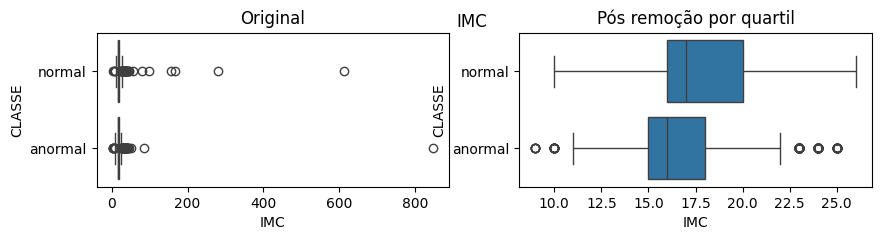

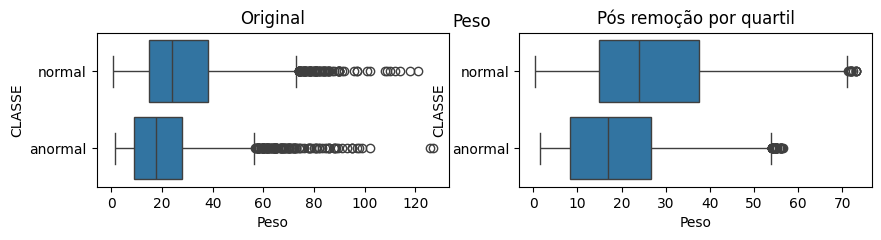

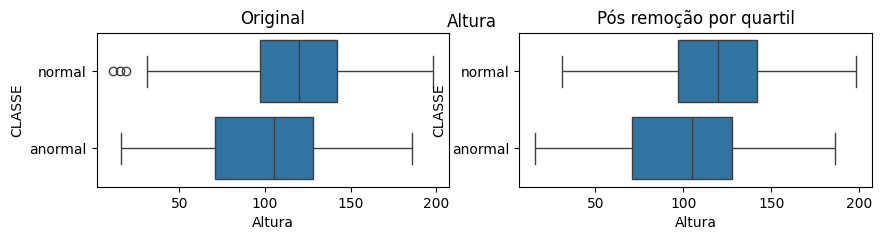

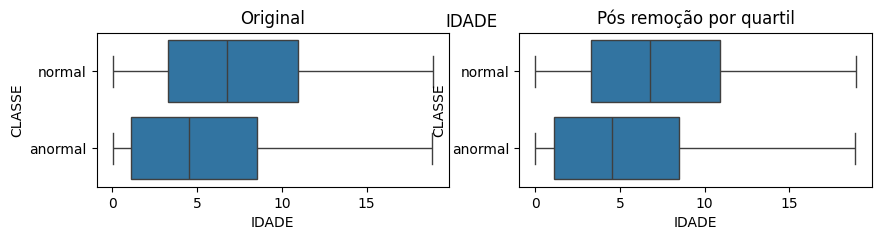

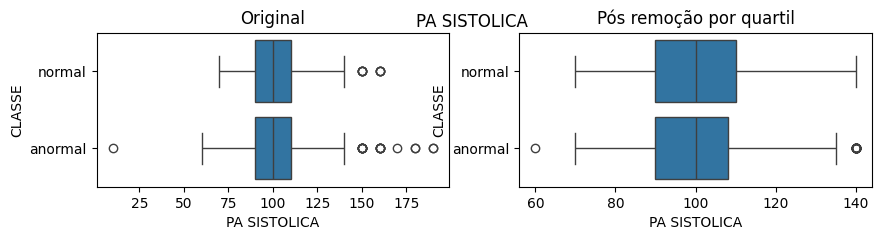

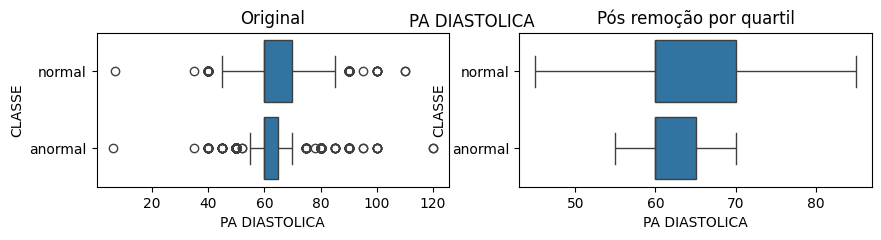

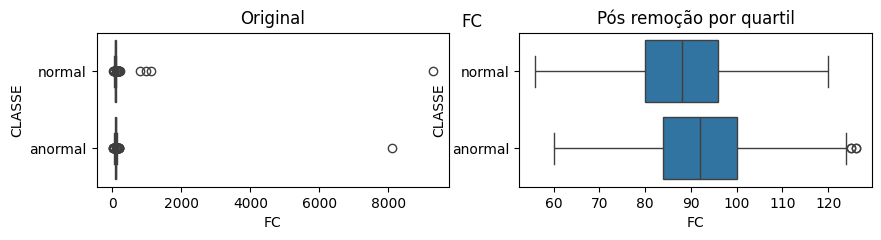

In [6]:
# IDENTIFICAR OUTLIERS POR BOXPLOT 

df_aux1 = invalidar_outliers_quartil(df_train, col_numerica)

for coluna in col_numerica:
    fig, axes = plt.subplots(1, 2, figsize=(10, 2), sharex=False, sharey=False)
    fig.suptitle(f"{coluna}")
    
    sns.boxplot(df_train, x=coluna, y='CLASSE', ax=axes[0])
    axes[0].set_title(f"Original")

    sns.boxplot(df_aux1, x=coluna, y='CLASSE', ax=axes[1])
    axes[1].set_title(f"Pós remoção por quartil")
    plt.show()

df_train = df_aux1


Para prevenir a inserção de viés com imputações excessivas, as amostras que apresentavam mais de 30% dos seus atributos faltantes e/ou inválidos foram removidas. 

In [7]:
# EXCLUIR REGISTROS COM MAIS DE 30% DOS ATRIBUTOS FALTANTES

analise_registro_incompleto(df_train, 0.3)
df_train = remover_registros_incompletos(df_train, 0.3).reset_index(drop=True)

print("Conjunto de treino sem registros com baixa taxa de preenchimento: ", df_train.shape)

98 de 10215 (0.96%) registros com mais de 30.0% dos atributos faltantes
Conjunto de treino sem registros com baixa taxa de preenchimento:  (10117, 15)


Analisamos diferentes métodos para a imputação de atributos numéricos, sendo eles o KNN, a média e a mediana. 

Aponta-se que o ajuste de todos eles foi realizado com o conjunto de treinamento.

In [8]:
# GERANDO DIFERENTES IMPUTADORES (fit feito com conjunto de treino!)

imputador_5nn = imputador_faltantes_knn(df_train, col_numerica, 5)
imputador_media = imputador_faltantes_media(df_train, col_numerica)
imputador_mediana = imputador_faltantes_mediana(df_train, col_numerica)

imputador_moda = imputador_faltantes_moda(df_train, col_categorica)
imputador_constante = imputador_faltantes_constante(df_train, col_categorica)


In [9]:
# IMPUTANDO DADOS NUMÉRICOS

df_train_imputed_5nn = pd.DataFrame(imputador_5nn.transform(df_train[col_numerica]), columns=col_numerica)
df_train_imputed_media = pd.DataFrame(imputador_media.transform(df_train[col_numerica]), columns=col_numerica)
df_train_imputed_mediana = pd.DataFrame(imputador_mediana.transform(df_train[col_numerica]), columns=col_numerica)

Relação de atributos e porcentagem de nulos: 


,qtd,%
IMC,333.0,3.291490
Peso,231.0,2.283286
Altura,3.0,0.029653
IDADE,501.0,4.952061
PA SISTOLICA,3776.0,37.323317
PA DIASTOLICA,4335.0,42.848671
FC,890.0,8.797074


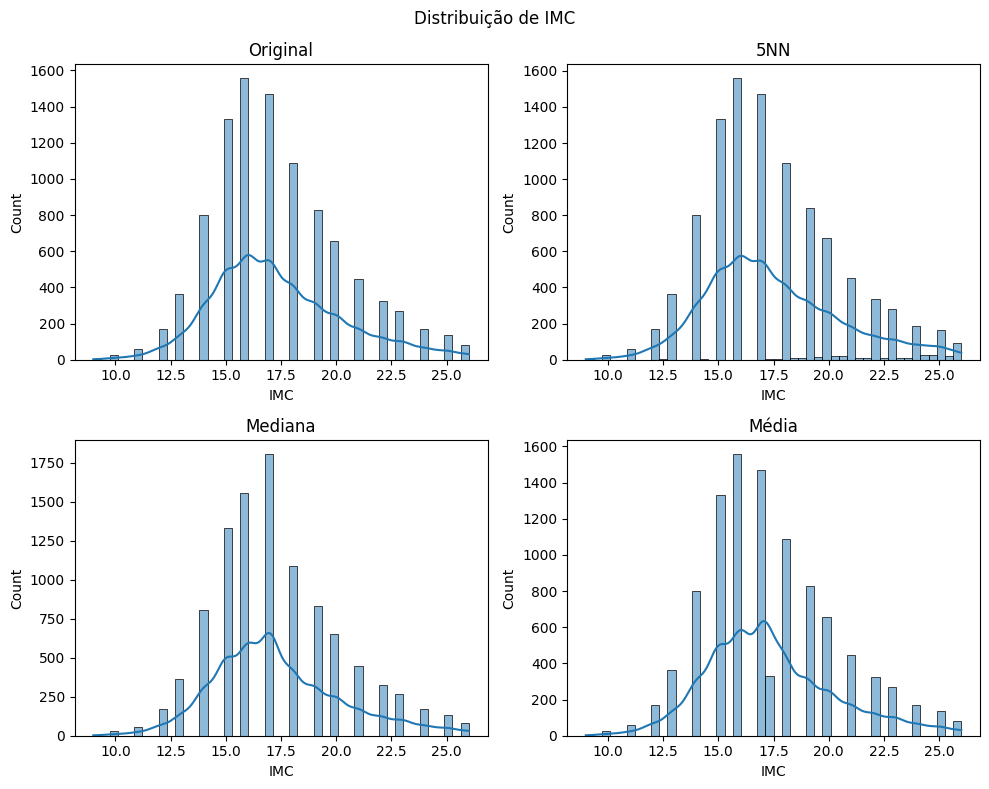

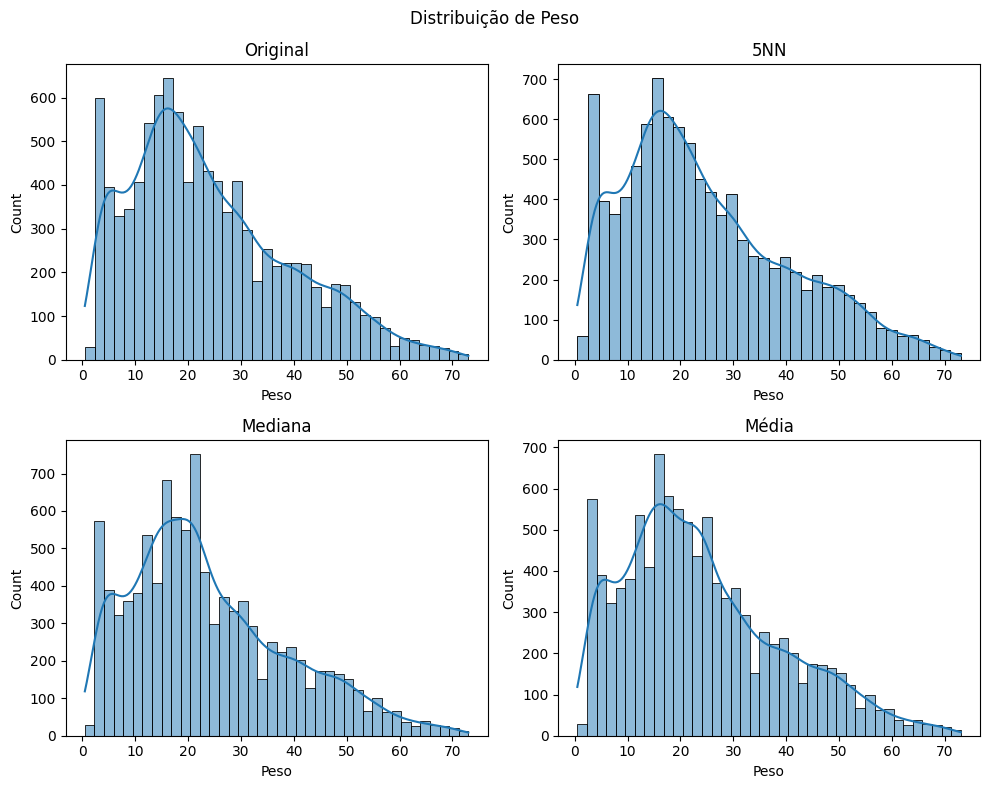

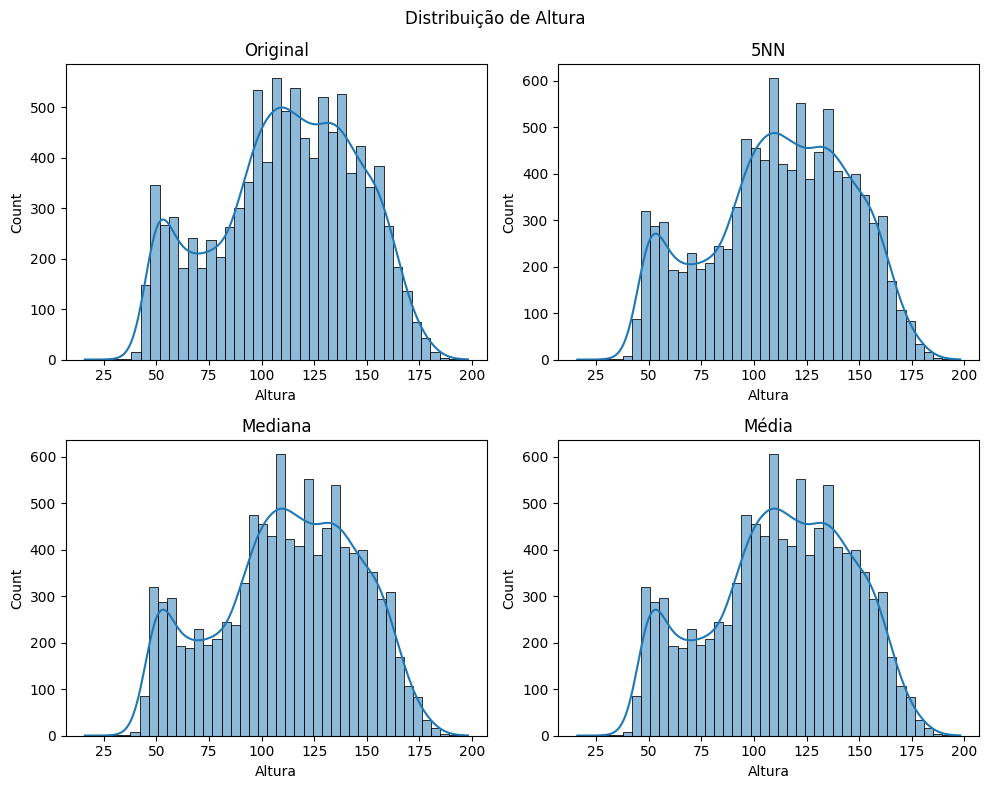

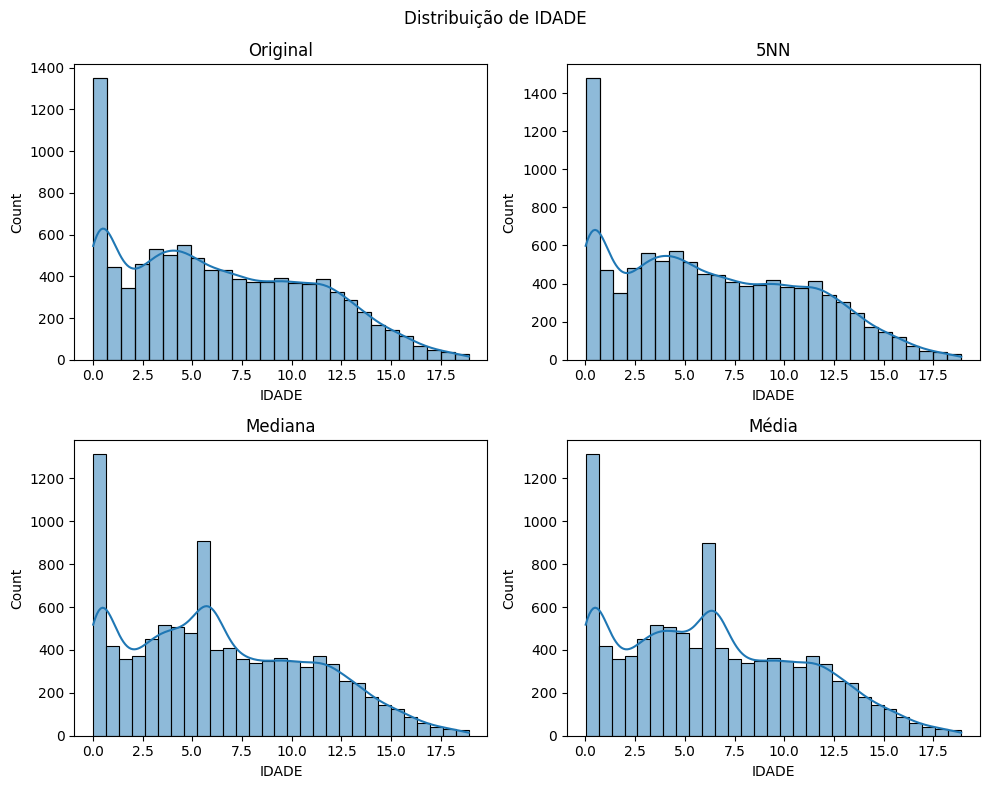

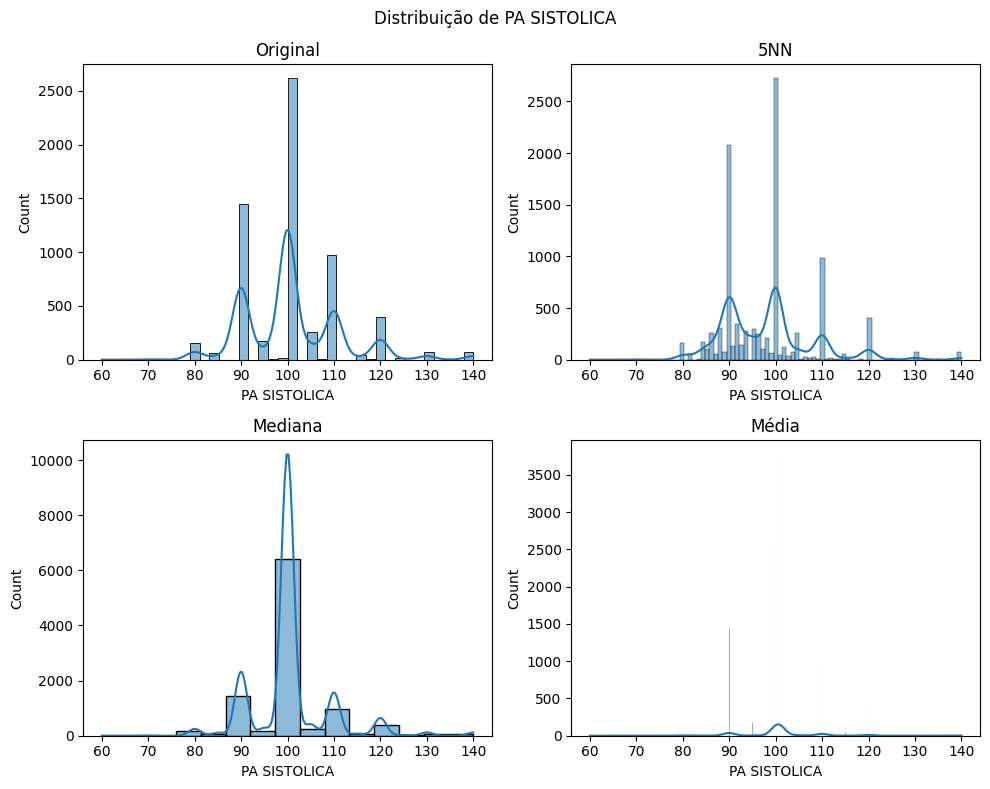

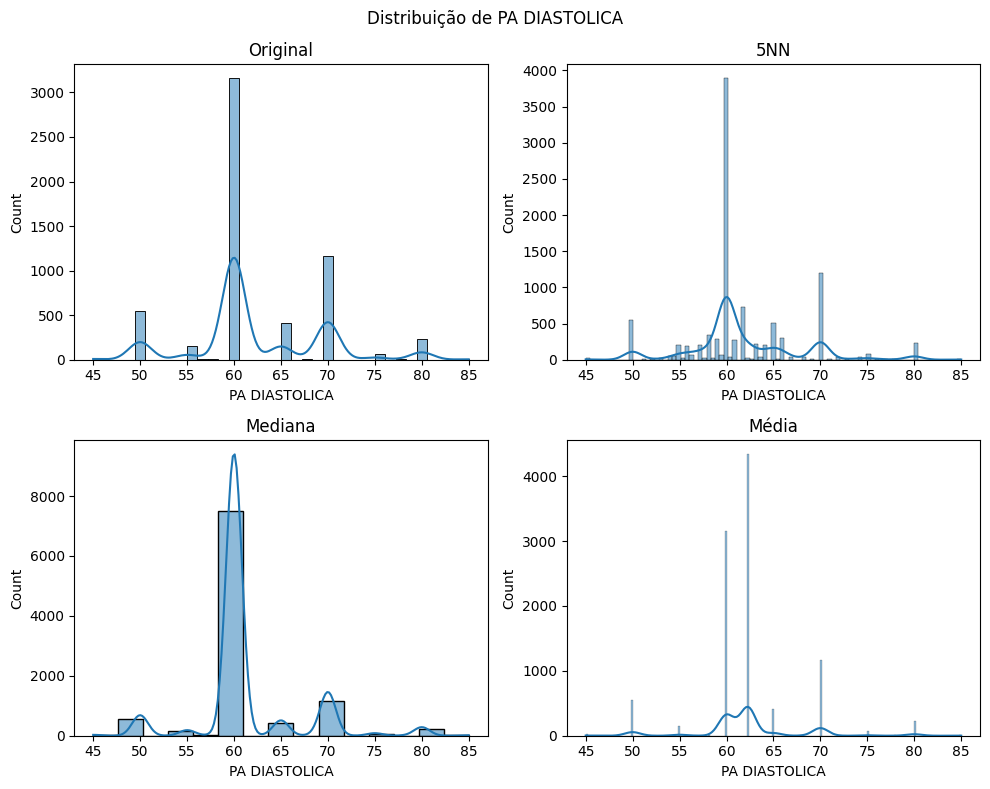

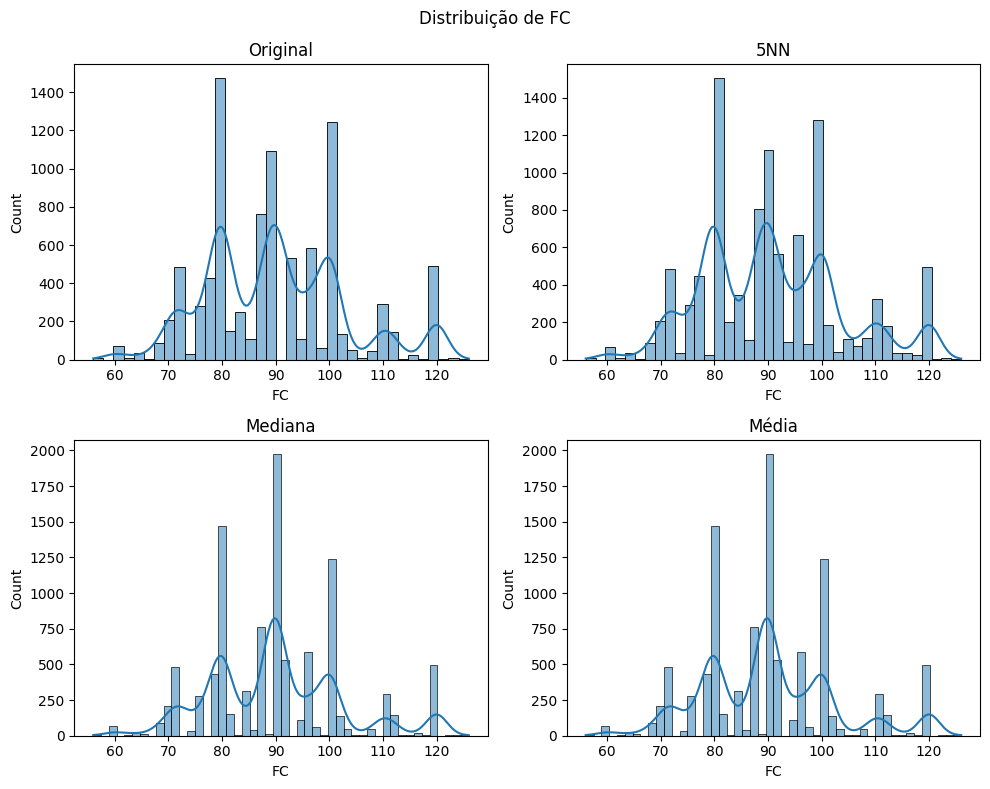

In [10]:
# COMPARANDO DISTRIBUIÇÃO ORIGINAL E DOS IMPUTADOS

analise_valores_faltantes(df_train[col_numerica])

for coluna in col_numerica:
    fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=False, sharey=False)
    fig.suptitle(f"Distribuição de {coluna}")
    # axes.set_xlabel("Valor")

    sns.histplot(df_train[coluna], ax=axes[0,0], kde=True)
    axes[0,0].set_title(f"Original")

    sns.histplot(df_train_imputed_5nn[coluna], ax=axes[0,1], kde=True)
    axes[0,1].set_title(f"5NN")
    
    sns.histplot(df_train_imputed_mediana[coluna], ax=axes[1,0], kde=True)
    axes[1,0].set_title(f"Mediana")
    
    sns.histplot(df_train_imputed_media[coluna], ax=axes[1,1], kde=True)
    axes[1,1].set_title(f"Média")

    plt.tight_layout()    
    plt.show()

Para os atributos categóricos, o método de imputação por moda e por constante foram avaliados.

Novamente, os ajustes dos transformadores foram reaizados com o conjunto de treinamento. 

In [11]:
# IMPUTANDO DADOS CATEGÓRICOS

df_train_imputed_constante = pd.DataFrame(imputador_constante.transform(df_train[col_categorica]), columns=col_categorica)
df_train_imputed_moda = pd.DataFrame(imputador_moda.transform(df_train[col_categorica]), columns=col_categorica)

Relação de atributos e porcentagem de nulos: 


,qtd,%
PULSOS,17.0,0.168034
B2,5.0,0.049422
SOPRO,0.0,0.000000
HDA 1,2306.0,22.793318
SEXO,269.0,2.658891
MOTIVO1,85.0,0.840170


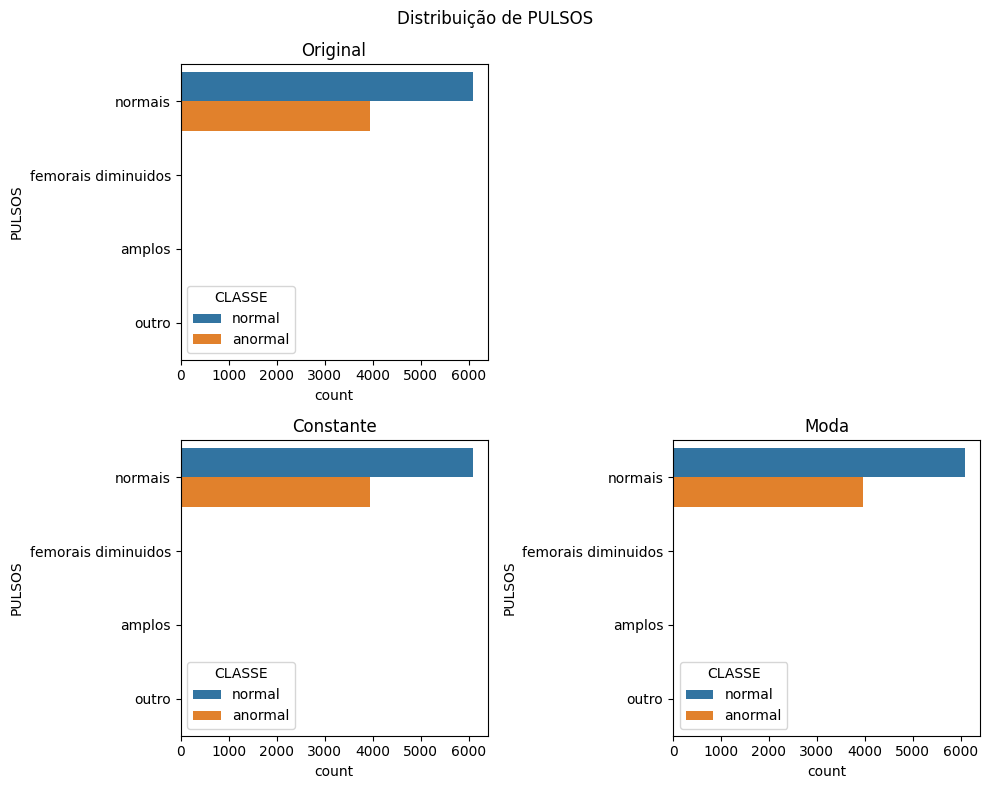

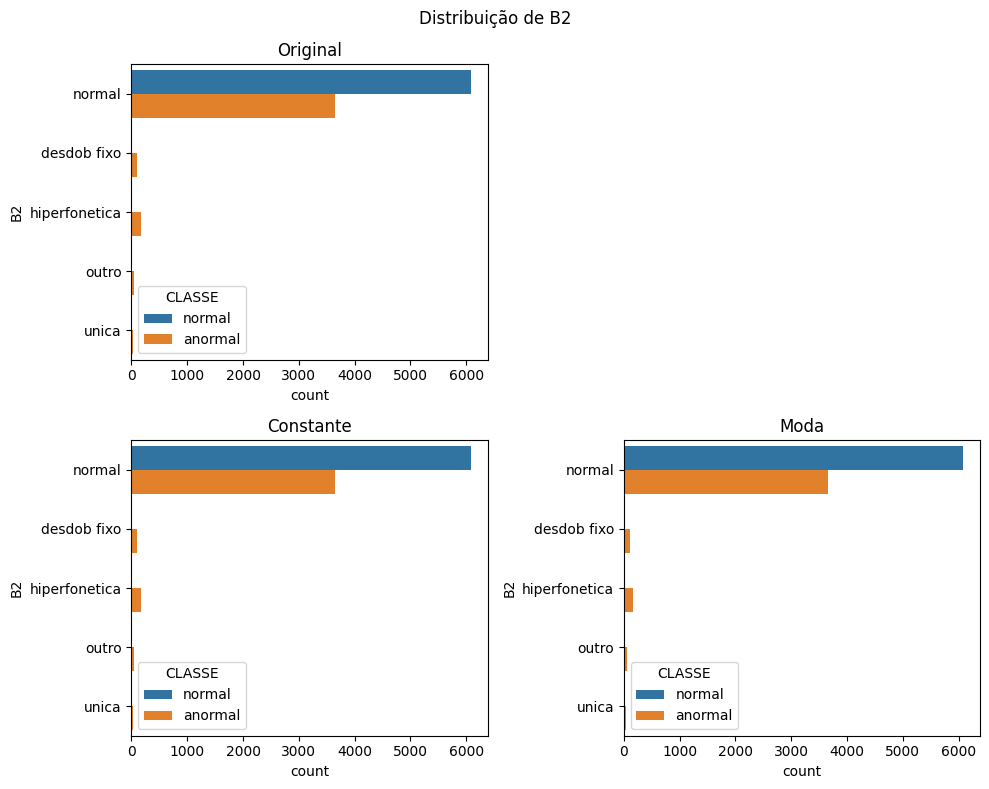

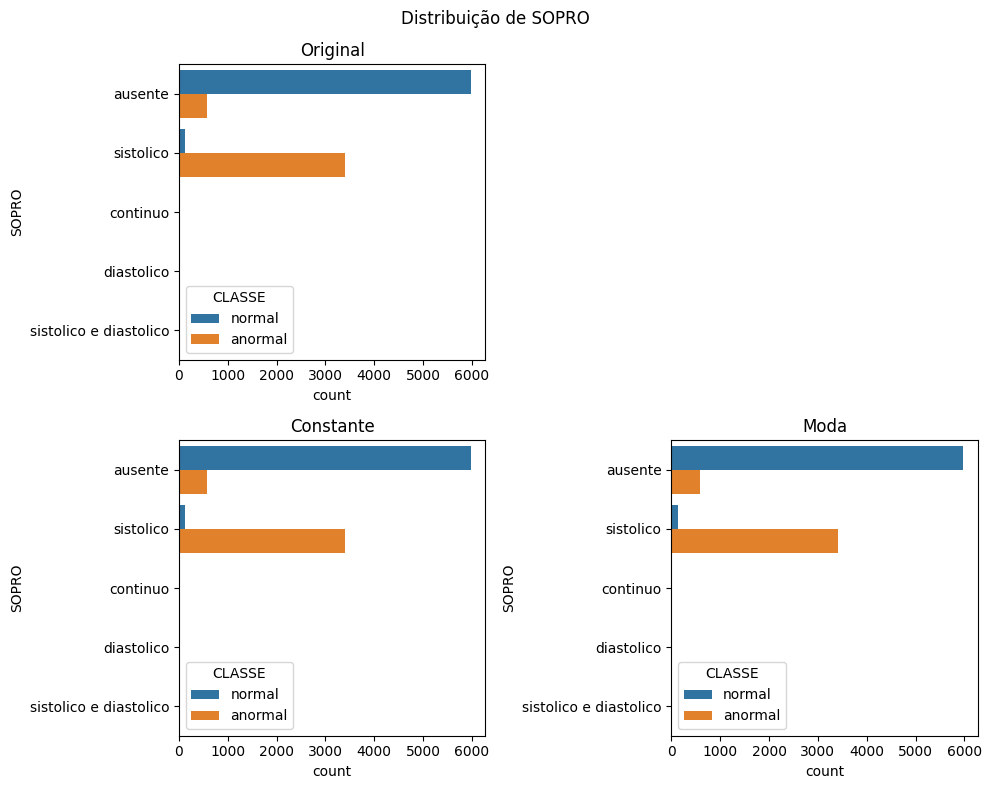

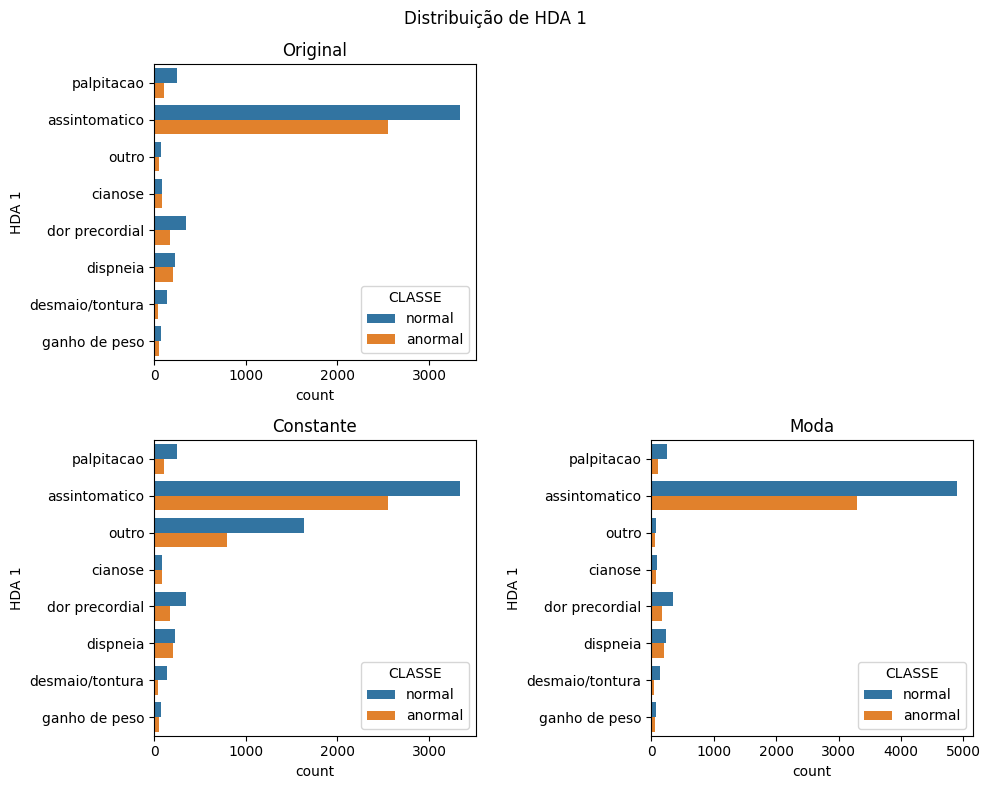

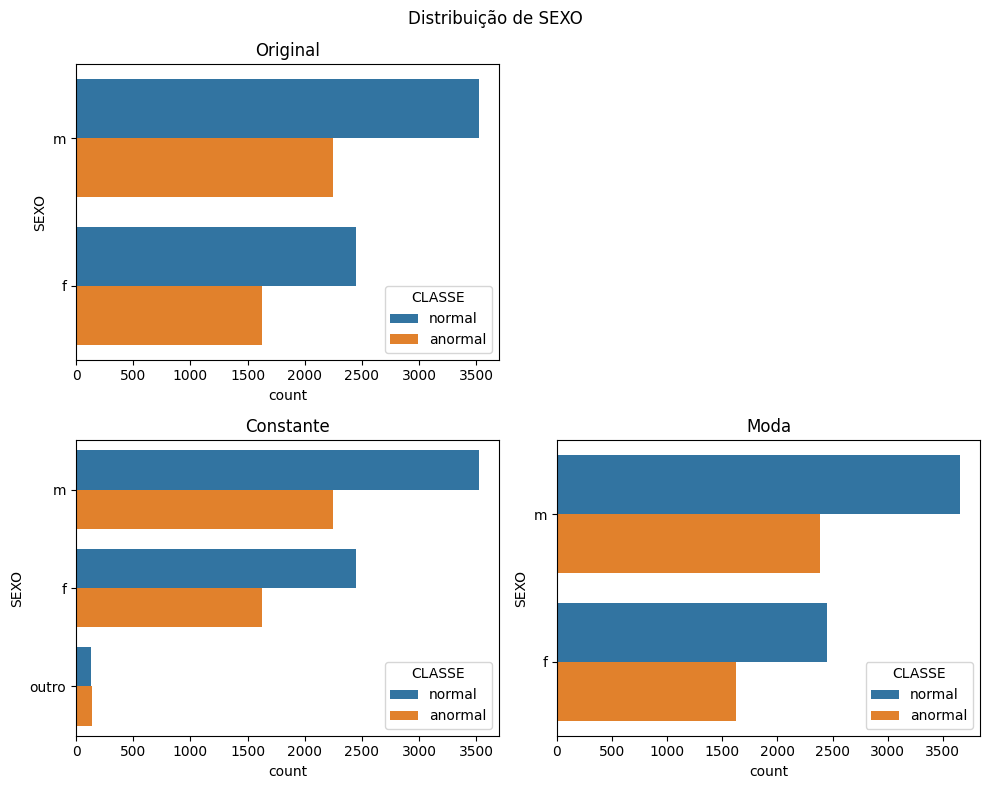

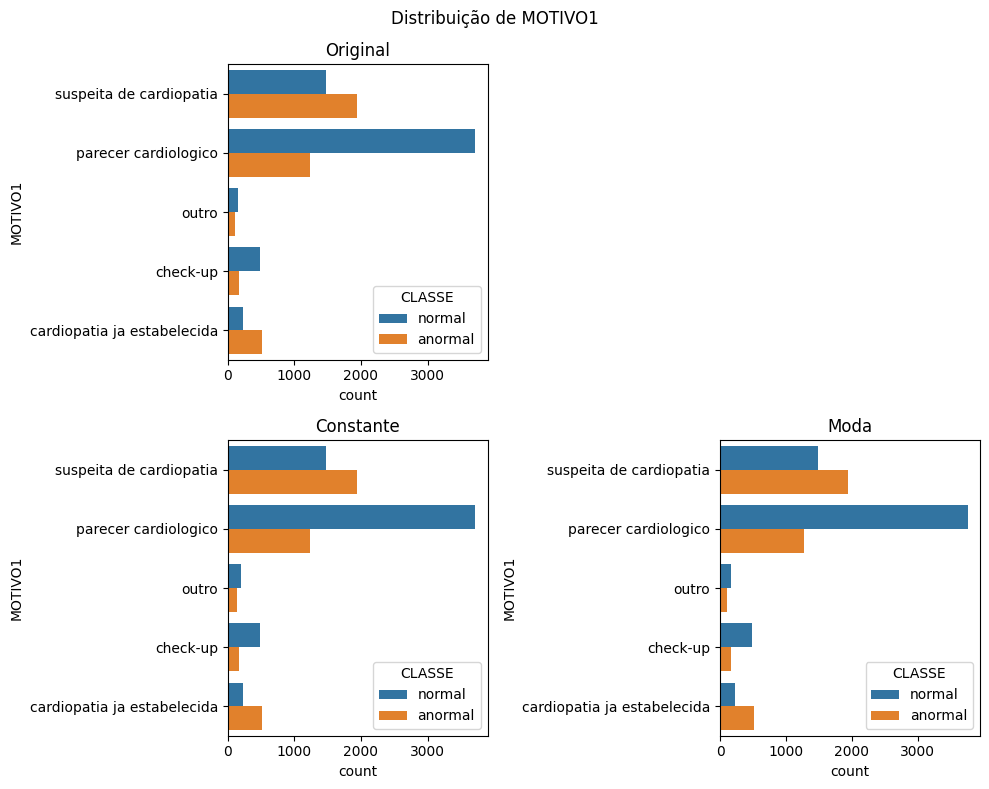

In [12]:
# COMPARANDO DISTRIBUIÇÃO ORIGINAL E DOS IMPUTADOS

df_train_imputed_constante = pd.concat([df_train_imputed_constante, df_train['CLASSE']], axis=1)
df_train_imputed_moda = pd.concat([df_train_imputed_moda, df_train['CLASSE']], axis=1)

analise_valores_faltantes(df_train[col_categorica])

for coluna in col_categorica:
    fig = plt.figure(figsize=(10, 8))
    fig.suptitle(f"Distribuição de {coluna}")

    gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1])

    ax1 = fig.add_subplot(gs[0, 0])  
    sns.countplot(data=df_train, y=coluna, ax=ax1, hue='CLASSE')
    ax1.set_title("Original")

    ax2 = fig.add_subplot(gs[1, 0])
    sns.countplot(data=df_train_imputed_constante, y=coluna, ax=ax2, hue='CLASSE')
    ax2.set_title("Constante")

    ax3 = fig.add_subplot(gs[1, 1])
    sns.countplot(data=df_train_imputed_moda, y=coluna, ax=ax3, hue='CLASSE')
    ax3.set_title("Moda")

    plt.tight_layout()
    plt.show()


df_train_imputed_constante = df_train_imputed_constante.drop(columns=['CLASSE'])
df_train_imputed_moda = df_train_imputed_moda.drop(columns=['CLASSE'])

Após a análise das distriuições pré e pós imputação, as estratégias adotadas para o preenchimento de faltantes foram a imputação 5NN e a imputação por constante para os dados numéricos e categóricos, respectivamente.

In [13]:
# ADOÇÃO DOS MELHORES IMPUTERS

# TREINO
df_train[col_numerica] = df_train_imputed_5nn
df_train[col_categorica] = df_train_imputed_constante

# TESTE
df_test[col_numerica] = pd.DataFrame(imputador_5nn.transform(df_test[col_numerica]), columns=col_numerica)
df_test[col_categorica] = pd.DataFrame(imputador_moda.transform(df_test[col_categorica]), columns=col_categorica)


Exclusão das duplicatas.

In [14]:
# EXLUIR DUPLICATAS (mesmos valores de atributos e mesma classifiação)

df_train = remover_duplicatas(df_train).reset_index(drop=True)
print("Conjunto de treino sem duplicatas: ", df_train.shape)

Conjunto de treino sem duplicatas:  (10061, 15)


Exclusão das inconsistências.

In [15]:
# EXCLUIR INCONSISTÊNCIAS (mesmos valores de atributos e classificação diferente)

df_train = remover_inconsistencia(df_train).reset_index(drop=True)
print("Registros de treino sem inconsistências: ", df_train.shape)

Registros de treino sem inconsistências:  (10061, 15)


Criação do atributo categórico baseado na frequência cardíaca por faixa-etária para descrever condições como brandicardia, taquicardia ou normalidade. 

In [16]:
# CRIANDO NOVOS ATRIBUTOS (FC_Categoria)

df_train = criar_novos_atributos(df_train)
df_test = criar_novos_atributos(df_test)

# +["FC_Categoria"]

Os codificadores Ordinal e OneHot foram escolhidos para a transformação simbólico-numérico dos atributos categóricos ordinais e nominais, respectivamente. 

Novamente, os transformadores foram ajustados somente com os dados de treino.

In [17]:
# GERANDO CODIFICADORES (fit feito com conjunto de treino!)

# codificador ordinal (com relação de ordem)
codificador_ordinal = codificador_ordinais(df_train, col_ordinal, col_ordinal_categorias) 

# codificador nominal (sem relações de ordem)
codificador_oneHot = codificador_nominais(df_train, col_nominal+["FC_Categoria"])

In [18]:
# TRANSFORMÇÃO SIMBÓLICO NUMÉRICO

# TREINO
df_train[col_ordinal] = pd.DataFrame(codificador_ordinal.transform(df_train[col_ordinal]), columns=col_ordinal)

df_train_encoded_nominal = pd.DataFrame(codificador_oneHot.transform(df_train[col_nominal+["FC_Categoria"]]), columns=codificador_oneHot.get_feature_names_out(col_nominal+["FC_Categoria"]))
# separação temporária da coluna CLASSE para preservar a ordem 
classes = df_train["CLASSE"]
df_train = df_train.drop(columns=["PULSOS", "B2", "SOPRO", "SEXO", "CLASSE"]+["FC_Categoria"])
# concatenação das novas colunas seguidas pela CLASSE
df_train = pd.concat([df_train, df_train_encoded_nominal], axis=1)
df_train = pd.concat([df_train, classes], axis=1)


# TESTE
df_test[col_ordinal] = pd.DataFrame(codificador_ordinal.transform(df_test[col_ordinal]), columns=col_ordinal)

df_test_encoded_nominal = pd.DataFrame(codificador_oneHot.transform(df_test[col_nominal+["FC_Categoria"]]), columns=codificador_oneHot.get_feature_names_out(col_nominal+["FC_Categoria"]))
df_test = df_test.drop(columns=["PULSOS", "B2", "SOPRO", "SEXO"]+["FC_Categoria"])
df_test = pd.concat([df_test, df_test_encoded_nominal], axis=1)

O atributo alvo foi codificado utilizando a técnica simples de LabelEncoding.

In [19]:
# CODIFICANDO ATRIBUTO ALVO 

df_train['CLASSE'] = df_train['CLASSE'].apply(lambda x: 0 if x in ['normal'] else 1 if x in ['anormal'] else np.nan)

In [20]:
# ANALISANDO CORRELAÇÃO

matriz_correlacao(df_train, col_numerica)

,IMC,Peso,Altura,IDADE,PA SISTOLICA,PA DIASTOLICA,FC
IMC,1.000000,0.651346,0.415387,0.391295,0.448356,0.303206,-0.265663
Peso,0.651346,1.000000,0.919511,0.901526,0.660094,0.376025,-0.595136
Altura,0.415387,0.919511,1.000000,0.935336,0.607969,0.272224,-0.667515
IDADE,0.391295,0.901526,0.935336,1.000000,0.583718,0.298072,-0.621042
PA SISTOLICA,0.448356,0.660094,0.607969,0.583718,1.000000,0.615098,-0.381049
PA DIASTOLICA,0.303206,0.376025,0.272224,0.298072,0.615098,1.000000,-0.086022
FC,-0.265663,-0.595136,-0.667515,-0.621042,-0.381049,-0.086022,1.000000


A normalização por padronização foi aplicada em todos os atributos. 

In [21]:
# GERAR NORMALIZADOR (fit feito com conjunto de treino!)

normalizador_padrao = normalizador(df_train, df_train.columns[1:-1])

In [22]:
# NORMLAIZAR ATRIBUTOS

# TREINO
df_train.iloc[:, 1:-1] = pd.DataFrame(normalizador_padrao.transform(df_train.iloc[:, 1:-1]), columns=df_train.columns[1:-1])

# TESTE
df_test.iloc[:, 1:] = pd.DataFrame(normalizador_padrao.transform(df_test.iloc[:, 1:]), columns=df_test.columns[1:])

A seguir, estão apresentados os conjuntos finais resultantes do pré-processamento, utilizados para o treinamento e para o teste dos modelos na seção seguinte. 

In [23]:
# CONJUNTO PÓS PREPROCESSAMENTO

display(df_train.iloc[:, 1:-1])
display(df_test.iloc[:, 1:])

,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC,HDA 1,MOTIVO1,PULSOS_amplos,...,SOPRO_continuo,SOPRO_diastolico,SOPRO_sistolico,SOPRO_sistolico e diastolico,SEXO_f,SEXO_m,SEXO_outro,FC_Categoria_bradicardia,FC_Categoria_normal,FC_Categoria_taquicardia
0,0.204504,0.332486,0.490953,-0.129671,1.213327,3.097470,0.728660,-0.095165,-0.512077,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,-0.821680,0.867457,-0.164474,-0.243695,0.248916,-0.047867
1,-0.754215,-0.744923,-0.159552,-0.898421,-0.196569,-1.322172,0.728660,-0.764250,-0.512077,-0.04991,...,-0.04463,-0.01727,1.366754,-0.00997,-0.821680,0.867457,-0.164474,-0.243695,0.248916,-0.047867
2,1.124875,0.721550,1.791963,-1.360101,0.206258,-0.302255,-0.961952,-0.764250,0.571188,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,1.217019,-1.152795,-0.164474,4.103493,-4.017424,-0.047867
3,1.291053,1.469751,-0.159552,0.258999,2.220395,1.397608,-0.808260,-0.764250,0.571188,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,-0.821680,0.867457,-0.164474,-0.243695,0.248916,-0.047867
4,-0.402685,-0.206219,-0.159552,-0.529078,-0.800810,-0.302255,0.113892,1.577545,-1.595343,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,1.217019,-1.152795,-0.164474,-0.243695,0.248916,-0.047867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10056,-0.517731,-0.355859,-0.159552,-0.623561,-0.800810,-0.302255,2.265579,1.577545,-0.512077,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,1.217019,-1.152795,-0.164474,-0.243695,0.248916,-0.047867
10057,0.012760,0.422270,-0.484804,0.516680,0.206258,-0.302255,-1.115644,-0.764250,0.571188,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,1.217019,-1.152795,-0.164474,-0.243695,0.248916,-0.047867
10058,0.332334,0.033206,1.791963,-0.305754,0.709792,1.397608,0.113892,0.573919,-0.512077,-0.04991,...,-0.04463,-0.01727,1.366754,-0.00997,1.217019,-1.152795,-0.164474,-0.243695,0.248916,-0.047867
10059,0.063892,0.541982,-0.810057,0.278325,-0.800810,-1.152186,-0.961952,-0.764250,-0.512077,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,-0.821680,0.867457,-0.164474,-0.243695,0.248916,-0.047867


,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC,HDA 1,MOTIVO1,PULSOS_amplos,...,SOPRO_continuo,SOPRO_diastolico,SOPRO_sistolico,SOPRO_sistolico e diastolico,SEXO_f,SEXO_m,SEXO_outro,FC_Categoria_bradicardia,FC_Categoria_normal,FC_Categoria_taquicardia
0,-1.297490,-1.732548,-0.810057,-1.340775,-1.203637,-0.404247,1.497119,0.573919,-2.678608,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,1.217019,-1.152795,-0.164474,-0.243695,0.248916,-0.047867
1,1.124875,1.140542,0.490953,1.296167,0.810499,-0.302255,-0.500876,-0.764250,0.571188,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,-0.821680,0.867457,-0.164474,-0.243695,0.248916,-0.047867
2,-0.428251,-0.236147,-0.159552,-0.552698,3.227463,4.797332,0.728660,1.243003,0.571188,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,-0.821680,0.867457,-0.164474,-0.243695,0.248916,-0.047867
3,-1.092963,-1.307570,-0.289653,-1.216228,-0.397983,-0.812214,0.574968,-0.764250,1.654454,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,1.217019,-1.152795,-0.164474,4.103493,-4.017424,-0.047867
4,-0.562471,0.518040,-0.224602,-0.516193,0.709792,-0.370249,-0.039800,-0.764250,0.571188,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,1.217019,-1.152795,-0.164474,-0.243695,0.248916,-0.047867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,0.020430,0.206788,-0.159552,0.278325,0.206258,1.397608,-1.423028,-0.764250,-2.678608,-0.04991,...,-0.04463,-0.01727,-0.731661,-0.00997,-0.821680,0.867457,-0.164474,-0.243695,0.248916,-0.047867
3142,-0.063937,0.254673,-0.679956,0.673437,-0.800810,-2.002117,-0.654568,0.239377,-0.512077,-0.04991,...,-0.04463,-0.01727,1.366754,-0.00997,1.217019,-1.152795,-0.164474,-0.243695,0.248916,-0.047867
3143,1.354968,1.170470,0.816205,1.596796,2.220395,-0.302255,0.421276,0.573919,-0.512077,-0.04991,...,-0.04463,-0.01727,1.366754,-0.00997,1.217019,-1.152795,-0.164474,-0.243695,0.248916,-0.047867
3144,-1.335839,-1.852260,-0.549855,-1.351511,-0.599396,0.037718,3.264577,-0.764250,-0.512077,-0.04991,...,-0.04463,-0.01727,1.366754,-0.00997,-0.821680,0.867457,-0.164474,-0.243695,0.248916,-0.047867


---
### Experimento e Análise dos Resultados

Na célula seguinte, os dados são armazenados em matrizes, sendo que parte do conjunto de treino é reservada para validação. 

In [24]:
# GUARDAR DATAFRAME EM MATRIZES
from sklearn.model_selection import train_test_split

# realizando a partição do conjunto de treino em treino (80%) e validação (20%)
X_train, X_val, y_train, y_val = train_test_split(df_train.iloc[:, 1:-1].values, df_train.iloc[:, -1].values, test_size=0.2, random_state=10)

X_test = df_test.iloc[:, 1:].values

O ajuste de hiperparâmetros e a avaliação dos modelos foram conduzidos por buscas em grade sobre 5-Folds estratificados verificando medidas de desempenho como matriz de confusão, acurácia, precisão, revocação, f-score e área sob a curva ROC. Além disso, a curva de aprendizado de cada modelo foi apresentado.

O melhor modelo é seleciondo com base na acurácia. 

Avaliando KNN...
Melhores parâmetros para KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


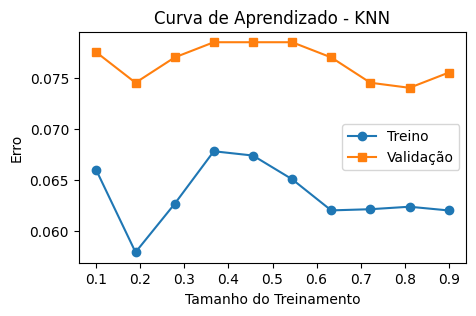

Accuracy: 0.9245
AUC-ROC: 0.9326
Confusion Matrix:
[[1174   33]
 [ 119  687]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1207
           1       0.95      0.85      0.90       806

    accuracy                           0.92      2013
   macro avg       0.93      0.91      0.92      2013
weighted avg       0.93      0.92      0.92      2013

Avaliando Naive Bayes...


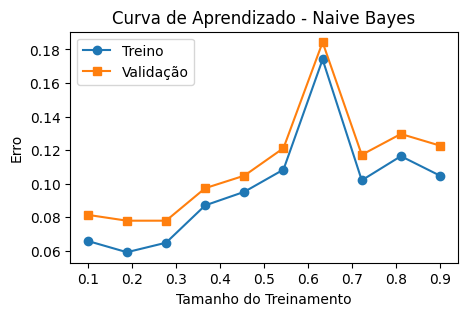

Accuracy: 0.8773
AUC-ROC: 0.9211
Confusion Matrix:
[[1178   29]
 [ 218  588]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      1207
           1       0.95      0.73      0.83       806

    accuracy                           0.88      2013
   macro avg       0.90      0.85      0.87      2013
weighted avg       0.89      0.88      0.87      2013

Avaliando Logistic Regression...
Melhores parâmetros para Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


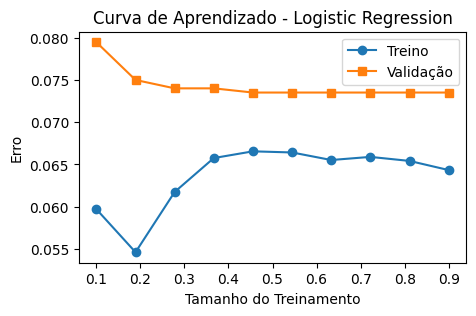

Accuracy: 0.9265
AUC-ROC: 0.9415
Confusion Matrix:
[[1179   28]
 [ 120  686]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1207
           1       0.96      0.85      0.90       806

    accuracy                           0.93      2013
   macro avg       0.93      0.91      0.92      2013
weighted avg       0.93      0.93      0.93      2013

Avaliando Random Forest...
Melhores parâmetros para Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 500}


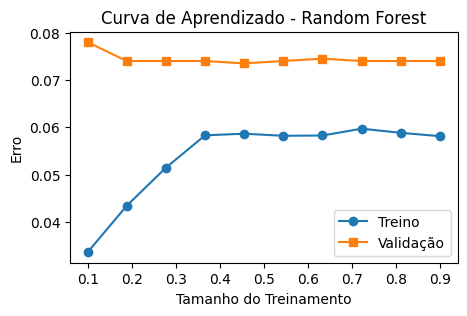

Accuracy: 0.9260
AUC-ROC: 0.9535
Confusion Matrix:
[[1179   28]
 [ 121  685]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1207
           1       0.96      0.85      0.90       806

    accuracy                           0.93      2013
   macro avg       0.93      0.91      0.92      2013
weighted avg       0.93      0.93      0.93      2013

Avaliando Gradient Boosting...
Melhores parâmetros para Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}


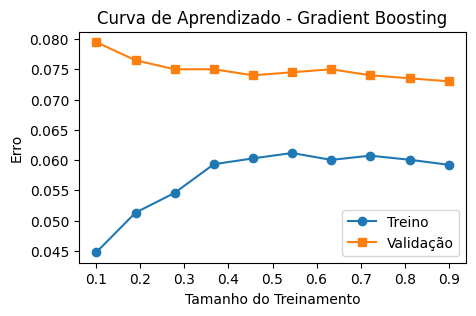

Accuracy: 0.9270
AUC-ROC: 0.9524
Confusion Matrix:
[[1180   27]
 [ 120  686]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1207
           1       0.96      0.85      0.90       806

    accuracy                           0.93      2013
   macro avg       0.93      0.91      0.92      2013
weighted avg       0.93      0.93      0.93      2013

Avaliando Neural Network...
Melhores parâmetros para Neural Network: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (30,)}


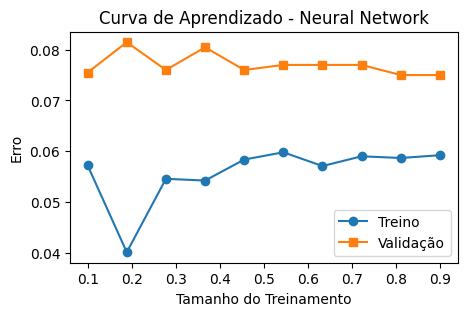

Accuracy: 0.9250
AUC-ROC: 0.9461
Confusion Matrix:
[[1177   30]
 [ 121  685]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1207
           1       0.96      0.85      0.90       806

    accuracy                           0.92      2013
   macro avg       0.93      0.91      0.92      2013
weighted avg       0.93      0.92      0.92      2013

Avaliando SVM...


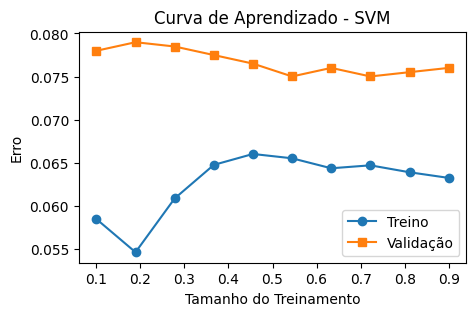

Accuracy: 0.9240
AUC-ROC: 0.9227
Confusion Matrix:
[[1172   35]
 [ 118  688]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1207
           1       0.95      0.85      0.90       806

    accuracy                           0.92      2013
   macro avg       0.93      0.91      0.92      2013
weighted avg       0.93      0.92      0.92      2013



In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# parâmetros para ajuste
param_grids = {
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "metric": ['euclidean', 'manhattan', 'minkowski'],
        "weights": ["uniform", "distance"] 
    },
    "Naive Bayes": {},  
    "Logistic Regression": {
        "C": [0.1, 1, 10], # inverso da regularização (1/lambda)
        "solver": ["liblinear"],
        "penalty": ["l1", "l2"] 
    },
    "Random Forest": {
        "n_estimators": [100, 200, 500],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200, 500],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    },
    "Neural Network": {
        "hidden_layer_sizes": [(100,), (50,), (30,)], 
        "activation": ["relu"],
        "alpha": [0.00001, 0.0001]
    },
    "SVM": {}
}


# modelos
models = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Neural Network": MLPClassifier(max_iter=10000, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}


results = avaliar_modelos(models, param_grids, X_train, y_train, X_val, y_val)

A seguir, a predição com o modelo que apresentou o melhor desempenho na validação é realizada.

In [26]:
# PREDIÇÃO

modelo = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=200)
modelo.fit(X_train, y_train)
y_test = modelo.predict(X_test)

df_test_y = pd.DataFrame({'Id': df_test['Id'], 'Predicted': y_test})
df_test_y.to_csv('submissoes/submission16.csv', index=False)